In [3]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import xlrd
import time
from IPython.display import Audio

In [4]:
#finish indicator
wow = '../../Data/Wow.mp3'
finished=Audio(url = wow, autoplay = True) 

In [5]:
#notebook complete indicator
notebook = '../../Data/Hugo Good Job.mp3'
complete=Audio(url = notebook, autoplay = True)

In [6]:
map = gpd.read_file('../../Data/NYC_Geo_prayer.json')

In [7]:
map=map[['postalCode','PO_NAME','borough','geometry']]

<AxesSubplot:>

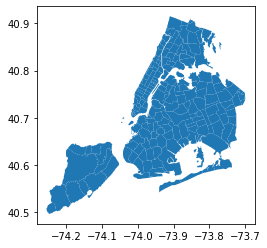

In [8]:
map.plot()

In [6]:
df=pd.read_csv('../../Data/Taxi Data/yellow_14/yellow_tripdata_2014-12.csv')

C:\Users\Bro Bro\.conda\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


df.info()

df2=df.head(100)

df2.columns

In [7]:
start_time = time.time()

df['dropoff_geometry'] = df.apply(lambda x: Point((float(x[' dropoff_longitude']), 
                                             float(x[' dropoff_latitude']))), 
                                             axis=1)

print("--- %s seconds ---" % (time.time() - start_time))
finished

--- 830.0735700130463 seconds ---


In [8]:
start_time = time.time()

df['pickup_geometry'] = df.apply(lambda x: Point((float(x[' pickup_longitude']), 
                                             float(x[' pickup_latitude']))), 
                                             axis=1)

print("--- %s seconds ---" % (time.time() - start_time))
finished

--- 806.7727379798889 seconds ---


In [9]:
df.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,dropoff_geometry,pickup_geometry
0,VTS,2014-12-12 18:16:00,2014-12-12 18:35:00,3,4.03,-74.014050,40.711707,1,NaN,-73.995627,40.759462,CSH,16.0,1.0,0.5,0.0,0.0,17.5,POINT (-73.995627 40.759462),POINT (-74.01404999999998 40.711707)
1,VTS,2014-12-12 18:18:00,2014-12-12 18:36:00,1,4.10,-73.945877,40.780525,1,NaN,-73.972558,40.740458,CRD,15.0,1.0,0.5,4.0,0.0,20.5,POINT (-73.97255800000001 40.740458),POINT (-73.94587699999998 40.780525)
2,VTS,2014-12-12 18:31:00,2014-12-12 18:35:00,1,0.96,-73.961450,40.796260,1,NaN,-73.955630,40.787760,CSH,5.5,1.0,0.5,0.0,0.0,7.0,POINT (-73.95563 40.78776),POINT (-73.96145 40.79626)


In [10]:
df2_start=df[[' passenger_count',' trip_distance',' fare_amount',' mta_tax',' tip_amount',' tolls_amount','pickup_geometry']]

In [11]:
df2_end=df[['dropoff_geometry']]

In [12]:
start_time = time.time()
df2_start=gpd.GeoDataFrame(df2_start,
                     crs=map.crs,
                     geometry=df2_start['pickup_geometry'])
print("--- %s seconds ---" % (time.time() - start_time))
finished

--- 108.0798089504242 seconds ---


In [13]:
start_time = time.time()
df2_end=gpd.GeoDataFrame(df2_end,
                     crs=map.crs,
                     geometry=df2_end['dropoff_geometry'])
print("--- %s seconds ---" % (time.time() - start_time))
finished

--- 107.77568984031677 seconds ---


In [14]:
start_time = time.time()

geo_processing_start = gpd.sjoin(df2_start, map, op = 'within')

print("--- %s seconds ---" % (time.time() - start_time))
finished

--- 1121.5685381889343 seconds ---


In [15]:
start_time = time.time()

geo_processing_end = gpd.sjoin(df2_end, map, op = 'within')

print("--- %s seconds ---" % (time.time() - start_time))
finished

--- 1110.1036806106567 seconds ---


In [16]:
group_start = geo_processing_start.groupby(['postalCode']).describe()

In [17]:
group_start.columns = ['_'.join(col) for col in group_start.columns.values]

group_start.to_csv('../../Data/yellow_tripdata_2014-2-start-processed.csv')

In [18]:
group_end = geo_processing_end.value_counts(['postalCode'])

In [19]:
group_end = pd.DataFrame(group_end,columns=['dropoff_count'])

group_end.to_csv('../../Data/yellow_tripdata_2014-2-end-processed.csv')

In [20]:
merge=group_start.merge(group_end, how='left', on='postalCode')

In [21]:
#REMEMBER TO RENAME CSV BEFORE START
merge.to_csv('../../Data/yellow_tripdata_2014-12-processed.csv')
complete

In [22]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 00083 to 11697
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    passenger_count_count  244 non-null    float64
 1    passenger_count_mean   244 non-null    float64
 2    passenger_count_std    242 non-null    float64
 3    passenger_count_min    244 non-null    float64
 4    passenger_count_25%    244 non-null    float64
 5    passenger_count_50%    244 non-null    float64
 6    passenger_count_75%    244 non-null    float64
 7    passenger_count_max    244 non-null    float64
 8    trip_distance_count    244 non-null    float64
 9    trip_distance_mean     244 non-null    float64
 10   trip_distance_std      242 non-null    float64
 11   trip_distance_min      244 non-null    float64
 12   trip_distance_25%      244 non-null    float64
 13   trip_distance_50%      244 non-null    float64
 14   trip_distance_75%      244 non-null    f

In [29]:
test=pd.read_csv('../../Data/Taxi Processed/yellow_tripdata_2014-10-processed.csv')

In [30]:
test

,postalCode,passenger_count_count,passenger_count_mean,passenger_count_std,passenger_count_min,passenger_count_25%,passenger_count_50%,passenger_count_75%,passenger_count_max,trip_distance_count,...,tolls_amount_max,index_right_count,index_right_mean,index_right_std,index_right_min,index_right_25%,index_right_50%,index_right_75%,index_right_max,dropoff_count
0,83,188377.0,1.766065,1.405008,0.0,1.0,1.0,2.0,9.0,188377.0,...,18.0,188377.0,82.000000,0.000000,82.0,82.0,82.0,82.0,82.0,172131
1,10001,895196.0,1.682938,1.339625,0.0,1.0,1.0,2.0,9.0,895196.0,...,20.0,895196.0,113.000000,0.000000,113.0,113.0,113.0,113.0,113.0,826930
2,10002,270194.0,1.727433,1.346475,0.0,1.0,1.0,2.0,9.0,270194.0,...,20.0,270194.0,123.000000,0.000000,123.0,123.0,123.0,123.0,123.0,241739
3,10003,784154.0,1.686129,1.343375,0.0,1.0,1.0,2.0,9.0,784154.0,...,20.0,784154.0,121.000000,0.000000,121.0,121.0,121.0,121.0,121.0,634260
4,10004,63787.0,1.714644,1.343959,0.0,1.0,1.0,2.0,9.0,63787.0,...,18.0,63787.0,138.000862,0.075225,138.0,138.0,138.0,138.0,145.0,79926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,11691,11.0,1.545455,1.213560,1.0,1.0,1.0,1.5,5.0,11.0,...,0.0,11.0,178.000000,0.000000,178.0,178.0,178.0,178.0,178.0,568
241,11692,7.0,1.142857,0.377964,1.0,1.0,1.0,1.0,2.0,7.0,...,4.0,7.0,182.000000,0.000000,182.0,182.0,182.0,182.0,182.0,125
242,11693,13.0,1.923077,1.382120,1.0,1.0,2.0,2.0,6.0,13.0,...,2.0,13.0,174.153846,8.101915,168.0,168.0,168.0,184.0,184.0,207
243,11694,9.0,1.333333,0.500000,1.0,1.0,1.0,2.0,2.0,9.0,...,2.0,9.0,186.000000,0.000000,186.0,186.0,186.0,186.0,186.0,396
